In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 0. Загрузка, предобработка и визуализация обучающих и тестовых данных

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [6]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [4]:
print( y_train.shape, y_test.shape)

(50000, 1) (10000, 1)


In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train / 255.0
X_test = X_test / 255.0

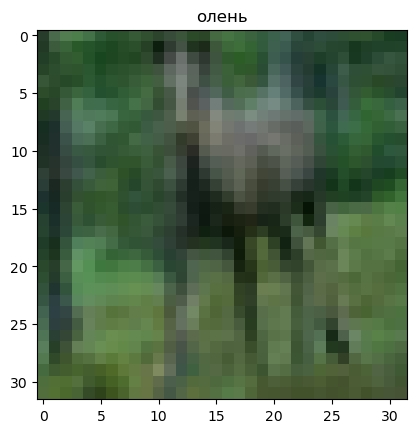

In [18]:
N = np.random.randint(0, X_test.shape[0] + 1)

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

# 1. Базовое решение

In [34]:
num_classes = len(classes)
num_epochs = 5
batch_size = 128

In [35]:
base_model = Sequential()

base_model.add(Conv2D(6, kernel_size=(8, 8), padding='same', activation='relu', input_shape=X_train.shape[1:]))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Conv2D(12, kernel_size=(3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Flatten())
base_model.add(Dense(512, activation='relu'))
base_model.add(Dense(num_classes, activation='softmax'))

base_model.summary()

base_model.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 6)         1158      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 12)        660       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 8, 12)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 768)               0         
                                                                 
 dense_8 (Dense)             (None, 512)              

Non-trainable params: 0
_________________________________________________________________


In [36]:
history = base_model.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

Epoch 1/5
391/391 [==============================] - 60s 151ms/step - loss: 1.6047 - accuracy: 0.4231 - val_loss: 1.3900 - val_accuracy: 0.4986
Epoch 2/5
391/391 [==============================] - 71s 182ms/step - loss: 1.3553 - accuracy: 0.5183 - val_loss: 1.3116 - val_accuracy: 0.5314
Epoch 3/5
391/391 [==============================] - 58s 147ms/step - loss: 1.2431 - accuracy: 0.5597 - val_loss: 1.2669 - val_accuracy: 0.5520
Epoch 4/5
391/391 [==============================] - 55s 141ms/step - loss: 1.1577 - accuracy: 0.5922 - val_loss: 1.1833 - val_accuracy: 0.5809
Epoch 5/5
391/391 [==============================] - 46s 117ms/step - loss: 1.0833 - accuracy: 0.6200 - val_loss: 1.1187 - val_accuracy: 0.6092


In [37]:
loss, metric = base_model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.1187 - accuracy: 0.6092


In [39]:
stata = pd.DataFrame(columns=['Название модели',
                              'Кол-во сверточных слоев',
                              'Кол-во фильтров',
                              'Accuracy test'
                              ])

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test


In [40]:
stata = stata.append({'Название модели': 'Базовое решение',
                     'Кол-во сверточных слоев': 2,
                     'Кол-во фильтров': 12 + 6,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,Базовое решение,2,18,0.6092


In [41]:
y_pred = base_model.predict(X_test)

313/313 [==============================] - 5s 16ms/step


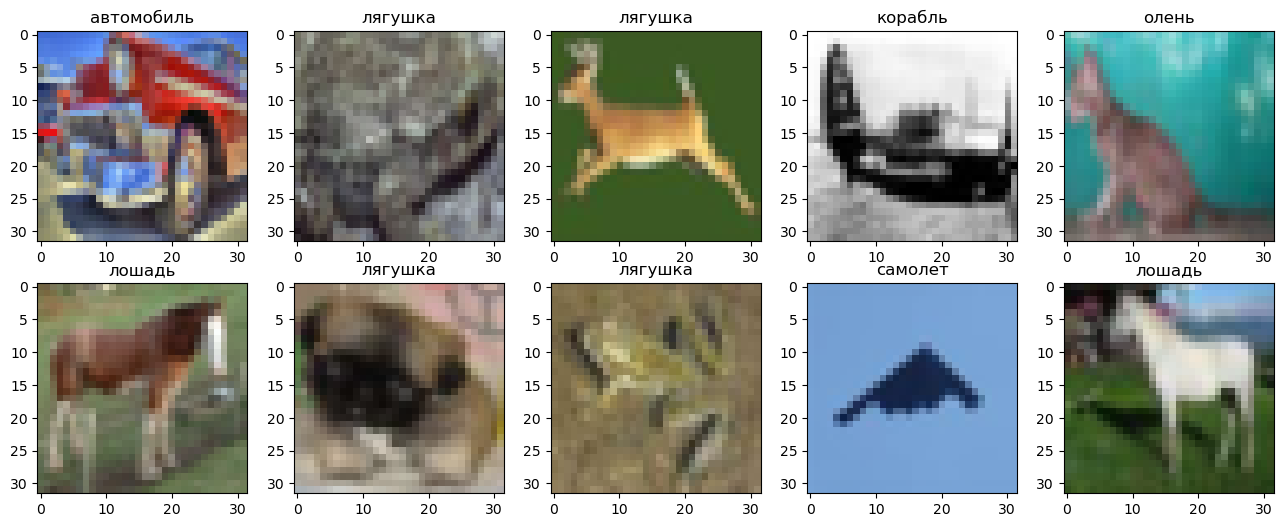

In [62]:
NN = np.random.randint(0, X_test.shape[0] + 1, num_classes)

plt.figure(figsize=(16,6))

for i, nn in enumerate(NN):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[nn])
    plt.title(classes[np.argmax(y_pred[nn,:])]);

# 2. Увеличение ширины сети (количества фильтров)

# 2.1 Сеть model_1